In [1]:
import numpy as np
from twobessel import *
import matplotlib.pyplot as plt
import cambPK 

In [2]:
%run cambPK.py

In [3]:
cambPK.pk_out

array([[1.00000000e-04, 3.40376513e+02],
       [1.00040042e-04, 3.40508187e+02],
       [1.00080100e-04, 3.40639912e+02],
       ...,
       [2.99759893e-01, 1.19373312e+03],
       [2.99879923e-01, 1.19274716e+03],
       [3.00000000e-01, 1.19176309e+03]])

# Cosmic variance

In [4]:
k, pk = np.loadtxt('Pkz0.0.dat', usecols=(0, 1), unpack=True)

# Get the logk-spacing
dlnk = np.log(k[1]/k[0])

N = k.size
print('Number of data points: '+str(N))

ell1 = 0
ell2 = 0
nu = 1.01

# Define the input 'kernel'. It has to be a matri: transform the pk to a diagonal matrix
pk1k2 = np.diag(k**3 * pk**2 / dlnk)

Number of data points: 20000


In [5]:
# Define the class for spherical Bessel 

sph_bessel = two_sph_bessel(k, k, pk1k2, nu1=nu, nu2=nu,  N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=0)

r1, r2, Fr1Fr2 = sph_bessel.two_sph_bessel(ell1, ell2)

20000 20000
(20000, 20000)
20000 20000


In [6]:
# Drop results above 200 Mpc/h

criterion = r1 <= 200

d1 = r1[criterion]
d2 = r2[criterion]

var_00 = Fr1Fr2[:len(d1), :len(d2)]

In [7]:
d1

array([  3.33333333,   3.33466806,   3.33600332, ..., 199.82318415,
       199.90319706, 199.98324201])

In [8]:
np.shape(var_00)

(10228, 10228)

In [9]:
np.shape(Fr1Fr2)

(20000, 20000)

In [10]:
from scipy.interpolate import RectBivariateSpline

# Create an interpolation function
f = RectBivariateSpline(d1, d2, var_00, kx=5, ky=5)

# Now you can call f with new r1 and r2 values to get an interpolated Fr1r2 value
r1_new = 20.  # replace with your desired r1 value
r2_new = 20.  # replace with your desired r2 value
Fr1r2_new = f(r1_new, r2_new)

In [11]:
Fr1r2_new

array([[58305.73490462]])

In [12]:
d1[325]

3.796512122729901

In [13]:
var_00[325, 325] / (2*np.pi**2)

54553.76256953731

In [14]:
d = np.arange(4, 175, 4)

d

array([  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,  52,
        56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104,
       108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156,
       160, 164, 168, 172])

In [15]:
f(20, 20) / (2*np.pi**2), f(4,4)/ (2*np.pi**2)

(array([[2953.80303684]]), array([[49520.81971906]]))

In [16]:
var_00_172 = f(d, d)

In [17]:
np.shape(var_00_172)

(43, 43)

In [18]:
Omm=0.3111	 
Omb=0.0490	 
h=0.677	 
ns=0.9665	 
Acamb=2.105e-09

In [19]:
Omm*h**2, Omb*h**2

(0.1425861519, 0.022458121000000004)

In [20]:
np.diag(var_00_172)

array([9.77501800e+05, 2.85787638e+05, 1.42179130e+05, 8.71156892e+04,
       5.83057349e+04, 4.24992541e+04, 3.17819730e+04, 2.37643427e+04,
       1.91014035e+04, 1.54950560e+04, 1.26367106e+04, 1.01213635e+04,
       8.57313410e+03, 7.22862155e+03, 6.41987070e+03, 5.61158869e+03,
       4.59303434e+03, 4.12393781e+03, 3.57120074e+03, 3.08293323e+03,
       2.78425134e+03, 2.41452911e+03, 2.16040067e+03, 2.04300837e+03,
       1.83313118e+03, 1.65054371e+03, 1.54245217e+03, 1.39918437e+03,
       1.20983094e+03, 1.15514955e+03, 1.08352640e+03, 9.52081858e+02,
       9.01328471e+02, 8.63275289e+02, 7.85144590e+02, 7.24065875e+02,
       7.07397528e+02, 6.42165185e+02, 5.95306887e+02, 5.80497169e+02,
       5.28365469e+02, 5.07894846e+02, 4.73794782e+02])

In [21]:
varcosmic_mono_ = np.loadtxt('varcosmic_mono_bare.dat', skiprows=3)

In [22]:
varcosmic_mono_[1,1], var_00_172[0,0]/(2*np.pi**2)

(6679.41, 49520.81971905866)

In [23]:
varcosmic_mono_[0,:], varcosmic_mono_[:,0]

(array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.]))

In [24]:
varcosmic_mono = varcosmic_mono_[1:,1:]

np.shape(varcosmic_mono)

(43, 43)

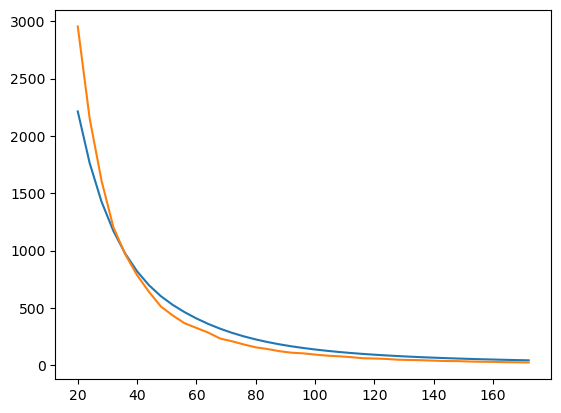

In [25]:
plt.plot(d[4:], np.diag(varcosmic_mono[4:, 4:]))
plt.plot(d[4:], np.diag(var_00_172[4:, 4:])/(2*np.pi**2))

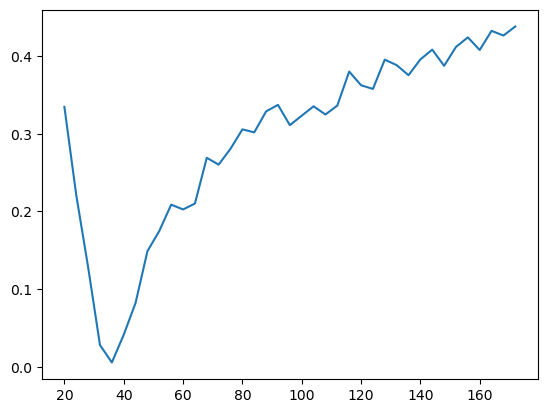

In [26]:
plt.plot(d[4:], np.abs((np.diag(var_00_172[4:, 4:])/(2*np.pi**2)-np.diag(varcosmic_mono[4:, 4:]))/np.diag(varcosmic_mono[4:, 4:])))

# Mixed terms

In [27]:
k, pk = np.loadtxt('Pkz0.0.dat', usecols=(0, 1), unpack=True)

# Get the logk-spacing
dlnk = np.log(k[1]/k[0])

N = k.size
print('Number of data points: '+str(N))

ell1 = 0
ell2 = 0
nu = 1.01

# Define the input 'kernel'. It has to be a matri: transform the pk to a diagonal matrix
pk1k2 = np.diag(k**3 * pk / dlnk)

Number of data points: 20000


In [28]:
# Define the class for spherical Bessel 

sph_bessel = two_sph_bessel(k, k, pk1k2, nu1=nu, nu2=nu,  N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=0)

r1, r2, Fr1Fr2 = sph_bessel.two_sph_bessel(ell1, ell2)

20000 20000
(20000, 20000)
20000 20000


In [29]:
# Drop results above 200 Mpc/h

criterion = r1 <= 200

d1 = r1[criterion]
d2 = r2[criterion]

mixvar_00 = Fr1Fr2[:len(d1), :len(d2)]

In [30]:
np.shape(mixvar_00)

(10228, 10228)

In [31]:
np.shape(Fr1Fr2)

(20000, 20000)

In [32]:
from scipy.interpolate import RectBivariateSpline

# Create an interpolation function
f = RectBivariateSpline(d1, d2, mixvar_00, kx=5, ky=5)

# Now you can call f with new r1 and r2 values to get an interpolated Fr1r2 value
r1_new = 20.  # replace with your desired r1 value
r2_new = 20.  # replace with your desired r2 value
Fr1r2_new = f(r1_new, r2_new)

In [33]:
Fr1r2_new

array([[4.54572241]])

In [34]:
d1[325]

3.796512122729901

In [35]:
2 * mixvar_00[325, 325] / (2*np.pi**2)

10.079963472895626

In [36]:
d = np.arange(4, 175, 4)

d

array([  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,  52,
        56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104,
       108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156,
       160, 164, 168, 172])

In [37]:
2 * f(20, 20) / (2*np.pi**2), 2 * f(4,4)/ (2*np.pi**2)

(array([[0.46057798]]), array([[9.23188652]]))

In [38]:
mixvar_00_172 = f(d, d)

In [39]:
np.shape(mixvar_00_172)

(43, 43)

In [40]:
np.diag(mixvar_00_172)

array([9.11150678e+01, 2.85327317e+01, 1.26487320e+01, 7.28471127e+00,
       4.54572241e+00, 3.17225412e+00, 2.30359520e+00, 1.64663745e+00,
       1.30431770e+00, 1.04812945e+00, 8.36274069e-01, 6.65925437e-01,
       5.62168701e-01, 4.71482608e-01, 4.19527166e-01, 3.64602806e-01,
       3.03010447e-01, 2.72855821e-01, 2.37644157e-01, 2.09045807e-01,
       1.89075705e-01, 1.66741579e-01, 1.51266831e-01, 1.41290069e-01,
       1.28480677e-01, 1.16997542e-01, 1.08860668e-01, 1.00187137e-01,
       8.90821875e-02, 8.44270476e-02, 7.93608558e-02, 7.14392196e-02,
       6.76955160e-02, 6.43794149e-02, 5.93866744e-02, 5.55082837e-02,
       5.33872723e-02, 4.94325570e-02, 4.63402487e-02, 4.46071090e-02,
       4.14761025e-02, 3.96579469e-02, 3.73377378e-02])

In [41]:
varmix_mono_ = np.loadtxt('varmix_mono_bare.dat', skiprows=3)

In [42]:
varmix_mono_[1,1], 2 * mixvar_00_172[0,0]/(2*np.pi**2)

(5.065468, 9.231886517786725)

In [43]:
varcosmic_mono_[0,:], varcosmic_mono_[:,0]

(array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.]))

In [44]:
varmix_mono = varmix_mono_[1:,1:]

np.shape(varmix_mono)

(43, 43)

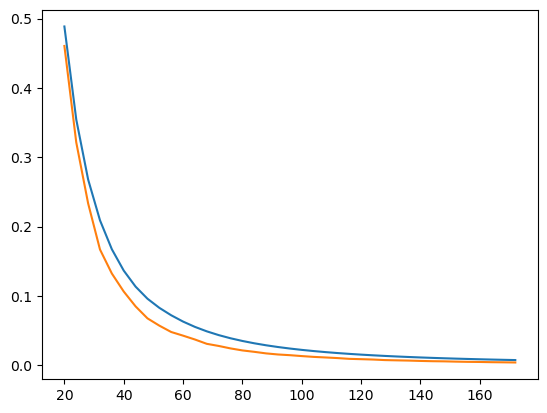

In [45]:
plt.plot(d[4:], np.diag(varmix_mono[4:, 4:]))
plt.plot(d[4:], 2*np.diag(mixvar_00_172[4:, 4:])/(2*np.pi**2))

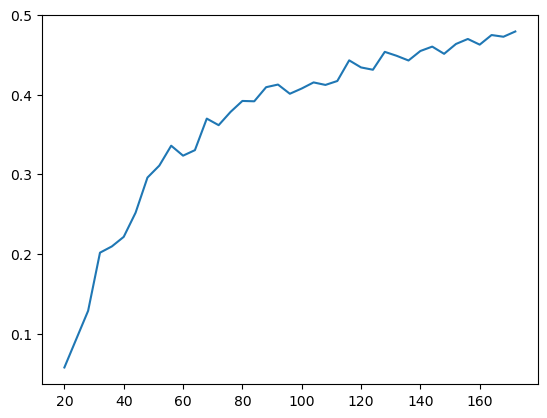

In [46]:
plt.plot(d[4:], np.abs((2*np.diag(mixvar_00_172[4:, 4:])/(2*np.pi**2)-np.diag(varmix_mono[4:, 4:]))/np.diag(varmix_mono[4:, 4:])))